In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from pandas import DataFrame

from pylab import *

from matplotlib.pyplot import figure

data_suicide = pd.read_excel('Ulker_countries 76-101.xlsx')

pivot_suicide=data_suicide.pivot_table(index=['country','year'],values=['suicides_no','population'], aggfunc={'suicides_no':sum,'population':sum})

pivot_suicide

population  suicides_no
country            year                         
Russian Federation 1989   135443800        37921
                   1990   136398200        39028
                   1991   137283000        39281
                   1992   138118900        45923
                   1993   137692800        55846
...                             ...          ...
Uzbekistan         2010    25651783         1464
                   2011    25978049         1640
                   2012    26381830         1835
                   2013    26838924         1950
                   2014    27313507         2095

[574 rows x 2 columns]

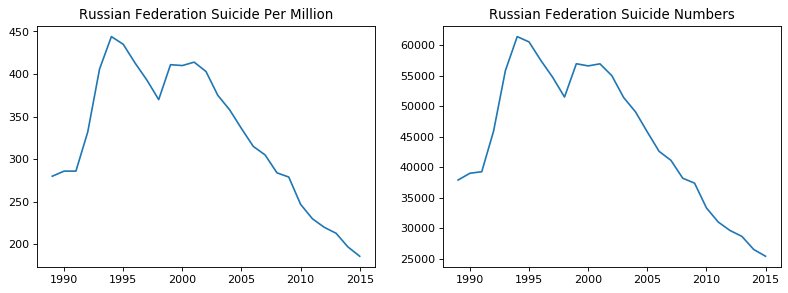

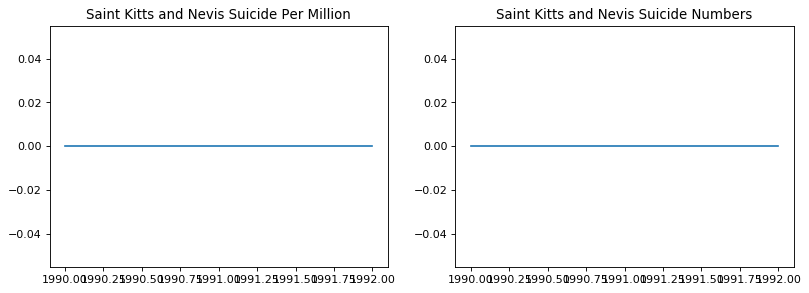

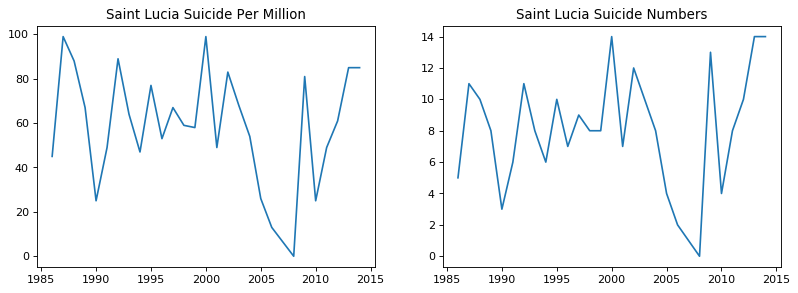

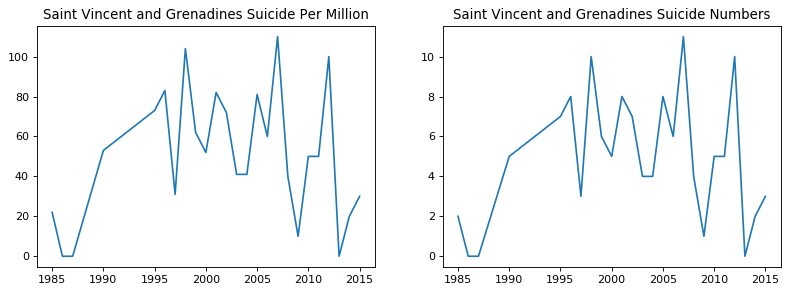

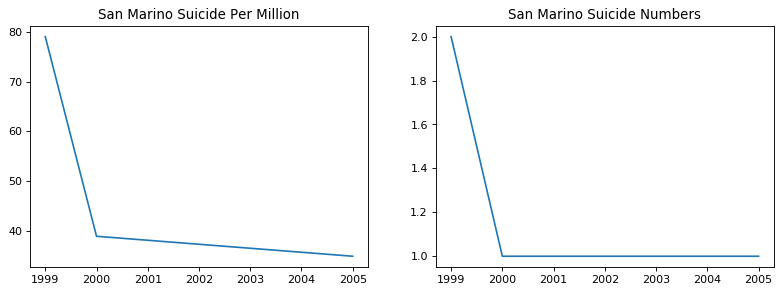

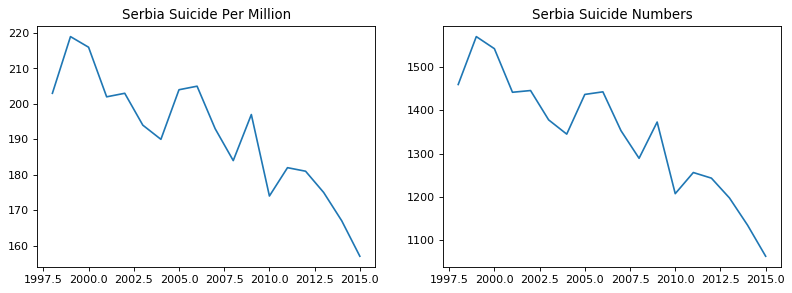

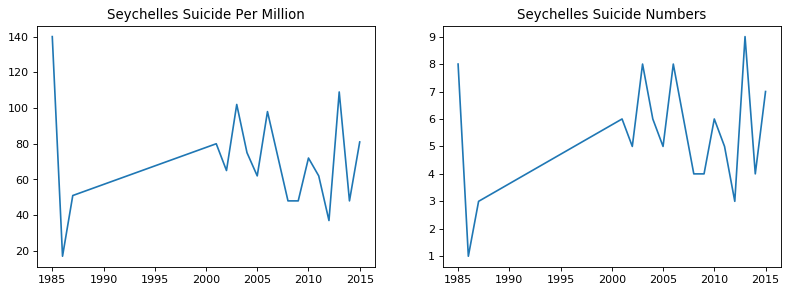

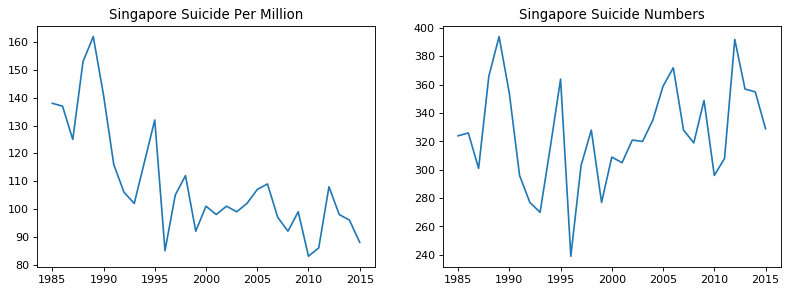

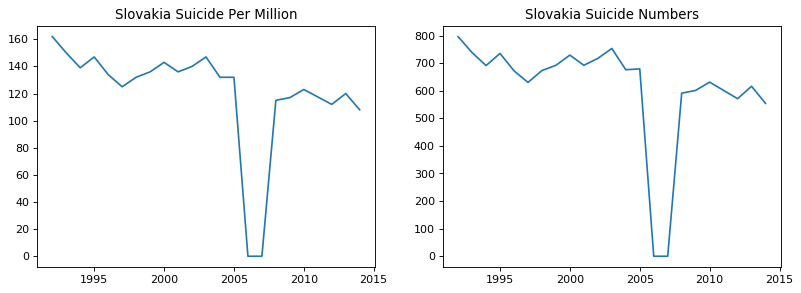

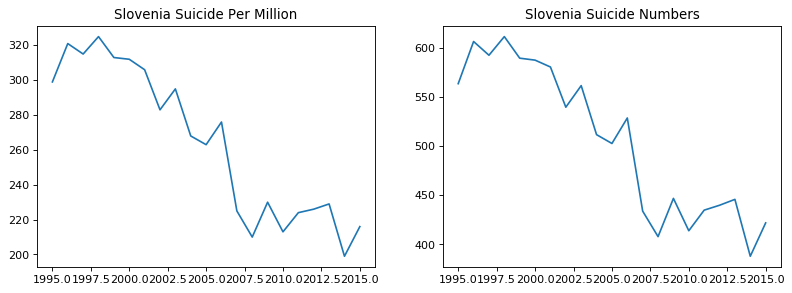

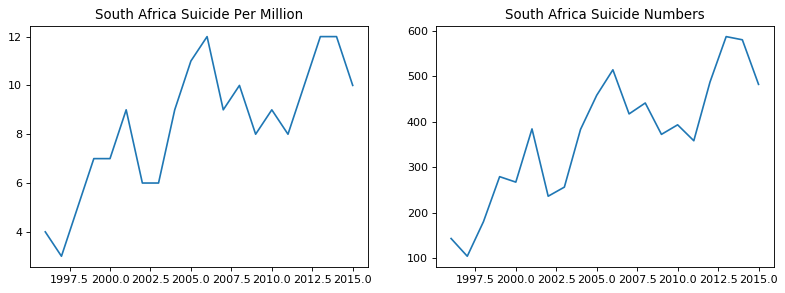

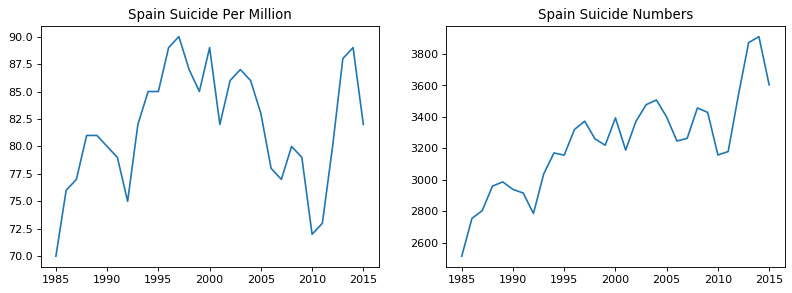

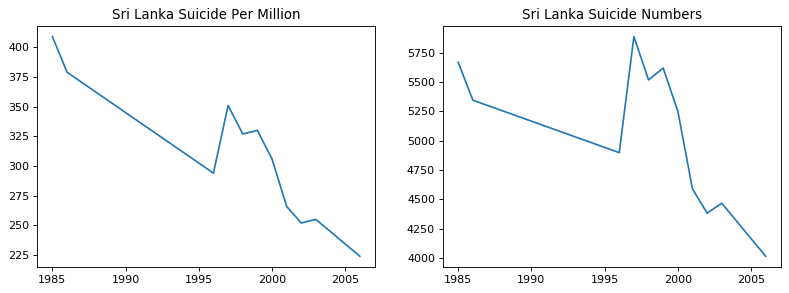

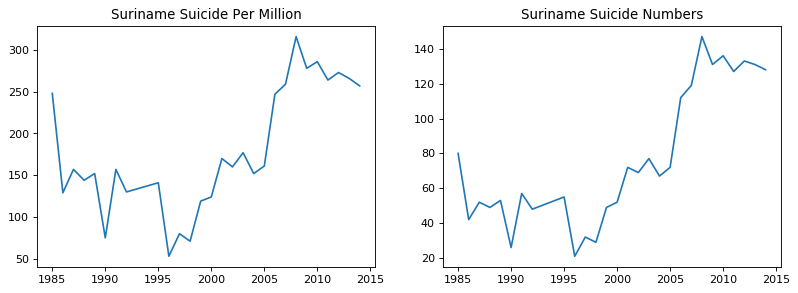

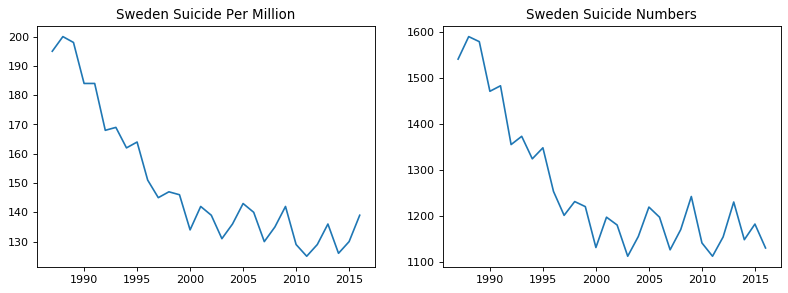

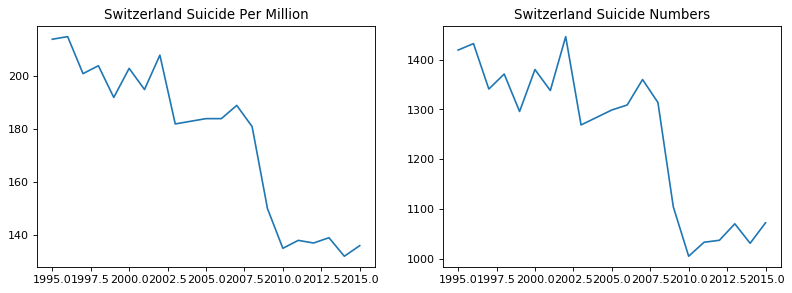

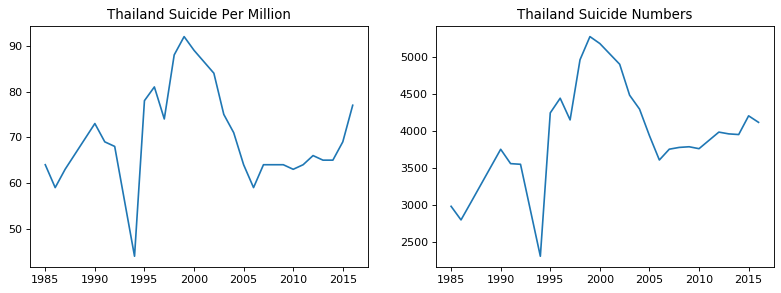

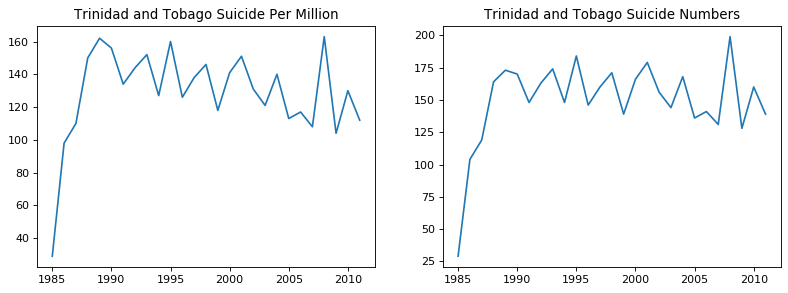

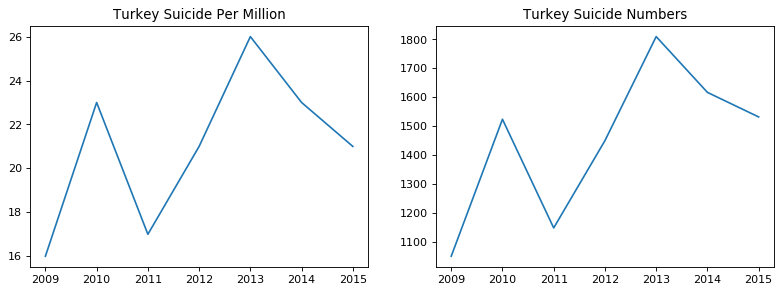

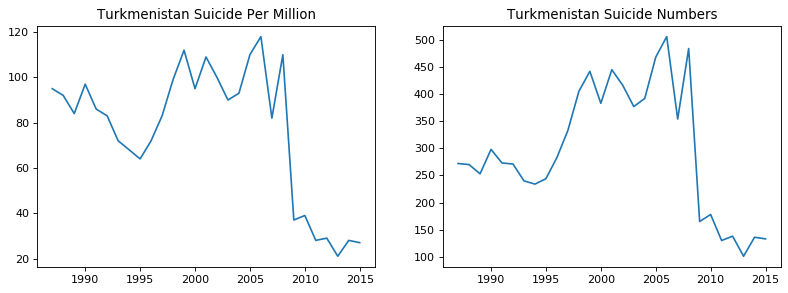

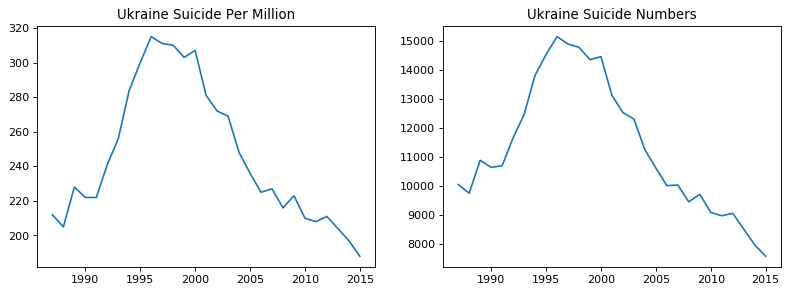

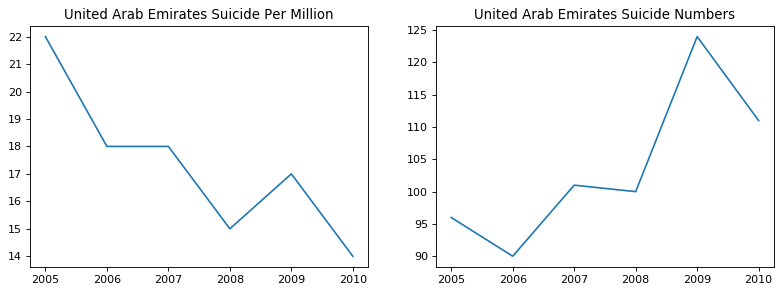

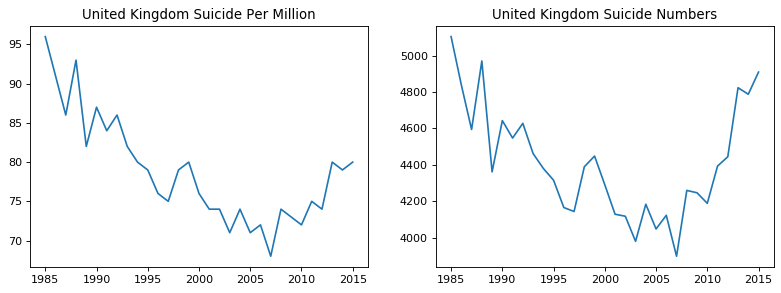

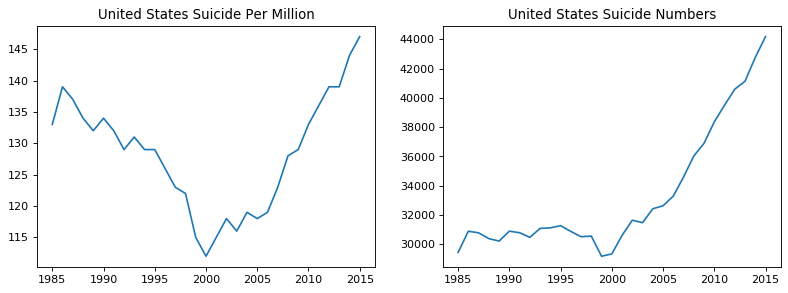

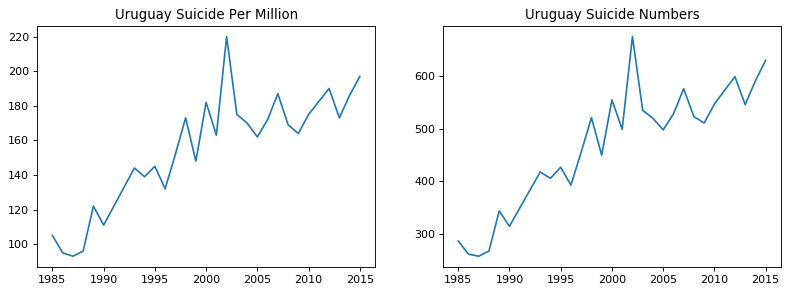

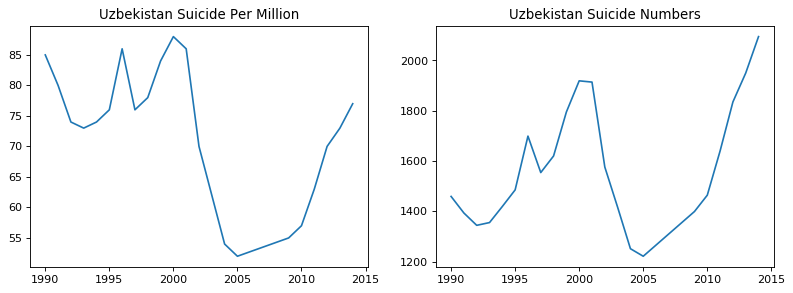

In [2]:
countries=pivot_suicide.index.get_level_values(0).unique()

for country in countries:
    
    split=pivot_suicide.xs(country)
    split['suicide_per_million']=((split.suicides_no/split.population)*1000000).round()
    split['year']=split.index
    
    df1=DataFrame(split,columns=['suicide_per_million'])
    df2=DataFrame(split,columns=['suicides_no'])
    df3=DataFrame(split,columns=['year'])
    df4=DataFrame(split,columns=['population'])

    figure(num=None, figsize=(12, 4), dpi=80, facecolor='w', edgecolor='k')
    
    subplot(1,2,1)
    title(country+' Suicide Per Million')
    plot(df3,df1)
    
    subplot(1,2,2)
    title(country+' Suicide Numbers')
    plot(df3,df2)
    
    show()
